In [1]:
import json
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
colors = 'Accent'
sns.set_palette(colors)

Depth no-depth

In [2]:
def convergence_speed(data):
    t_errors = np.array(data['history']['t_error'])
    initial_t_error = t_errors[0]
    convergence_threshold = initial_t_error * 0.1
    conv_idx = np.argmax(t_errors<convergence_threshold)
    conv = t_errors.min()/initial_t_error
    return conv, conv_idx


In [12]:
def load_results():
    dir_path = "results"
    test_id = 338
    test_ids = []
    model_ress = []
    subsets = []
    errors = []
    convs = []
    conv_idxs = []
    for i, subset in enumerate(["chair", "drums", "ficus", "hotdog", "lego", "materials", "mic", "ship"]):
        for model_res in ['fine', 'coarse']:
            for error in [1, 2, 3]:
                file_name = os.path.join(dir_path, f'{test_id:06d}-data.json')
                with open(file_name, "r") as fp:
                    data = json.loads(fp.read())
                conv, conv_idx = convergence_speed(data)
                test_ids.append(test_id)
                model_ress.append(model_res)
                subsets.append(subset)
                errors.append(error)
                convs.append(conv)
                conv_idxs.append(conv_idx)
                test_id += 1
    df = pd.DataFrame()
    df['test_id'] = test_ids
    df['model_res'] = model_ress
    df['subset'] = subsets
    df['error'] = errors
    df['conv'] = convs
    df['conv_idx'] = conv_idxs
    df.loc[df.conv_idx == 0, 'conv_idx'] = 1000
    return df
df = load_results()
df.head(5)

,test_id,model_res,subset,error,conv,conv_idx
0,338,fine,chair,1,0.014478,121
1,339,fine,chair,2,0.021507,375
2,340,fine,chair,3,0.033855,795
3,341,coarse,chair,1,0.016797,86
4,342,coarse,chair,2,0.011117,197


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

coarse vs. fine: Mann-Whitney-Wilcoxon test two-sided, P_val:5.363e-03 U_stat=1.525e+02


/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


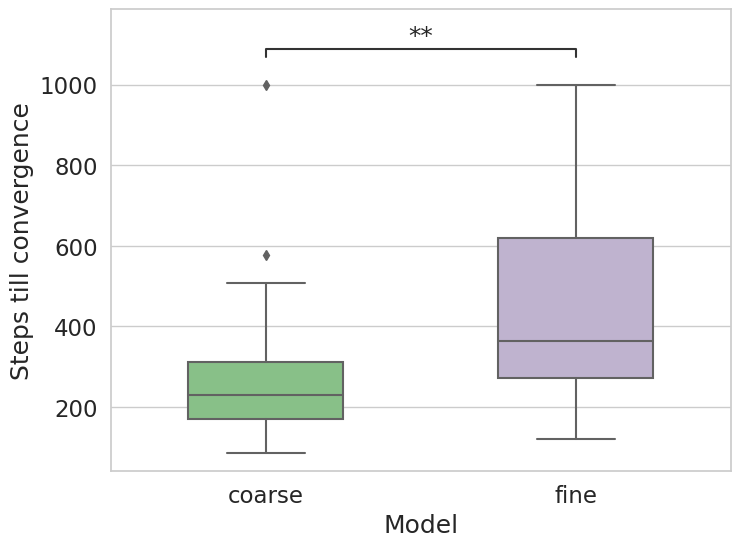

In [10]:
labels = ['coarse', 'fine']
errors = [1, 2, 3]
with sns.plotting_context('notebook', font_scale=1.5):
    plt.figure(figsize=(8,6))
    coarse = df[df.model_res == 'coarse'].conv_idx.values
    fine = df[df.model_res == 'fine'].conv_idx.values
    df_ = pd.DataFrame(list(zip(coarse, fine)), columns=labels)
    ax = sns.boxplot(data=df_, palette=colors, width=0.5)
    ax.set(ylabel='Steps till convergence',
           xlabel='Model')
    annotator = Annotator(ax, [labels], data=df_)
    annotator.configure(test='Mann-Whitney', text_format='star', verbose=1)
    annotator.apply_and_annotate()
#plt.savefig("diagrams/plotVII.png",dpi=200)
plt.show()

/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/cs

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

coarse vs. fine: Mann-Whitney-Wilcoxon test two-sided, P_val:3.792e-02 U_stat=1.200e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

coarse vs. fine: Mann-Whitney-Wilcoxon test two-sided, P_val:1.476e-02 U_stat=9.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

coarse vs. fine: Mann-Whitney-Wilcoxon test two-sided, P_val:1.025e-01 U_stat=1.600e+01


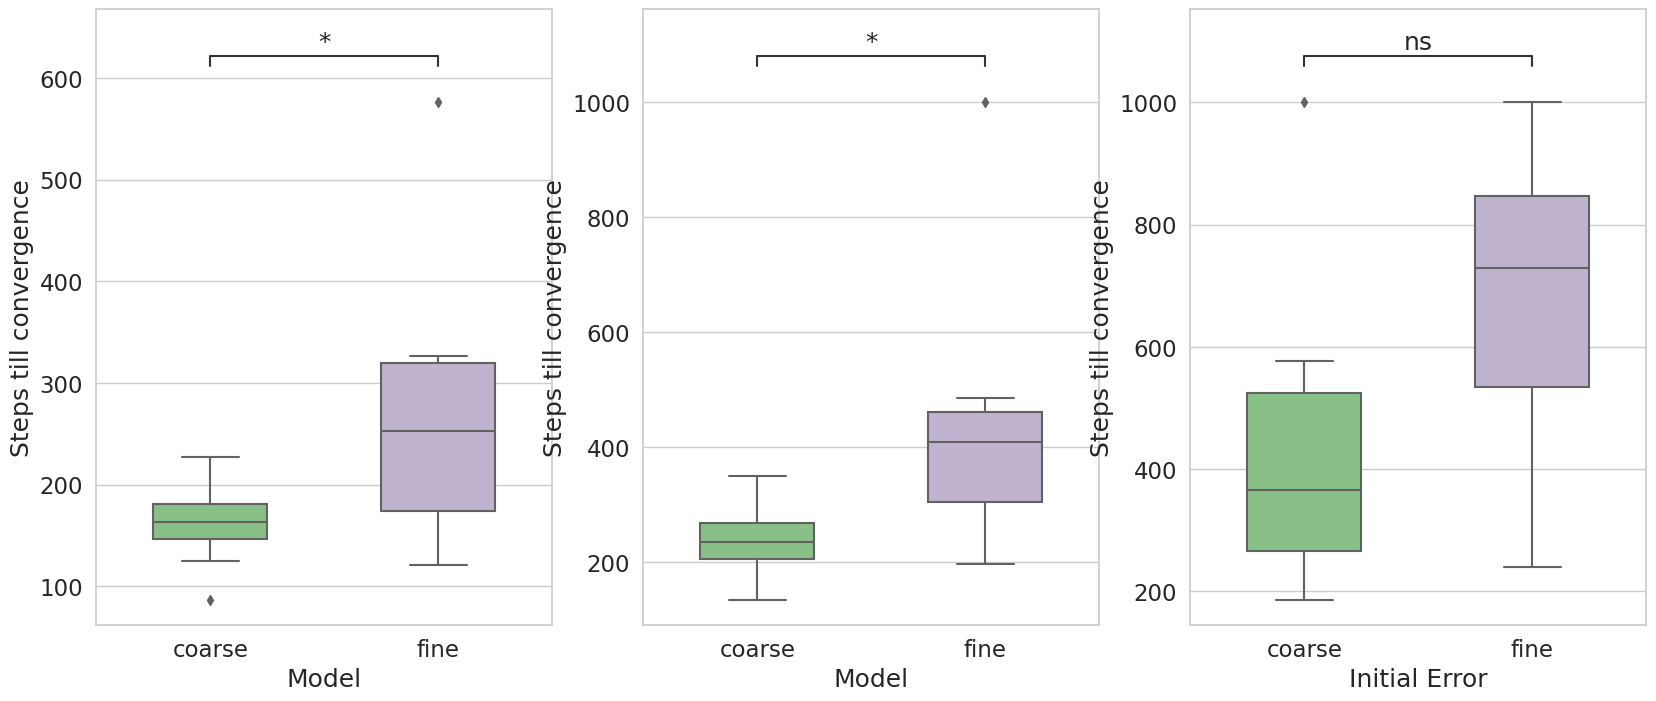

In [9]:
labels = ['coarse', 'fine']
errors = [1, 2, 3]
with sns.plotting_context('notebook', font_scale=1.5):
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    for error, ax in zip(errors, axs):
        df_ = df[df.error == error]
        coarse = df_[df_.model_res == 'coarse'].conv_idx.values
        fine = df_[df_.model_res == 'fine'].conv_idx.values
        df_ = pd.DataFrame(list(zip(coarse, fine)), columns=labels)
        ax = sns.boxplot(data=df_, palette=colors, width=0.5, ax=ax)
        ax.set(ylabel='Steps till convergence',
               xlabel='Model')
        annotator = Annotator(ax, [labels], data=df_)
        annotator.configure(test='Mann-Whitney', text_format='star', verbose=1)
        annotator.apply_and_annotate()
    plt.xlabel('Initial Error')
#plt.savefig("diagrams/plotVII.png",dpi=200)
plt.show()

Multi img

In [3]:
def load_multi_img_results():
    dir_path = "results"
    test_id = 482
    test_ids = []
    steps = []
    subsets = []
    errors = []
    convs = []
    conv_idxs = []
    for i, subset in enumerate(["chair", "drums", "ficus", "hotdog", "lego", "materials", "mic", "ship"]):
        for step in [1, 2, 4, 8, 16]:
            for error in [2, 4, 8]:
                file_name = os.path.join(dir_path, f'{test_id:06d}-data.json')
                with open(file_name, "r") as fp:
                    data = json.loads(fp.read())
                conv, conv_idx = convergence_speed(data)
                test_ids.append(test_id)
                steps.append(step)
                subsets.append(subset)
                errors.append(error)
                convs.append(conv)
                conv_idxs.append(conv_idx)
                test_id += 1
    df = pd.DataFrame()
    df['test_id'] = test_ids
    df['step'] = steps
    df['subset'] = subsets
    df['error'] = errors
    df['conv'] = convs
    df['conv_idx'] = conv_idxs
    return df
df = load_multi_img_results()
df.loc[df.conv_idx == 0, 'conv_idx'] = 1000

In [4]:
df.head()

,test_id,step,subset,error,conv,conv_idx
0,482,1,chair,2,0.005606,370
1,483,1,chair,4,0.003519,644
2,484,1,chair,8,0.656302,1000
3,485,2,chair,2,0.003956,200
4,486,2,chair,4,0.002906,598


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:4.037e-01 U_stat=3.290e+02
4 vs. 16: Mann-Whitney-Wilcoxon test two-sided, P_val:2.048e-01 U_stat=3.500e+02


/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


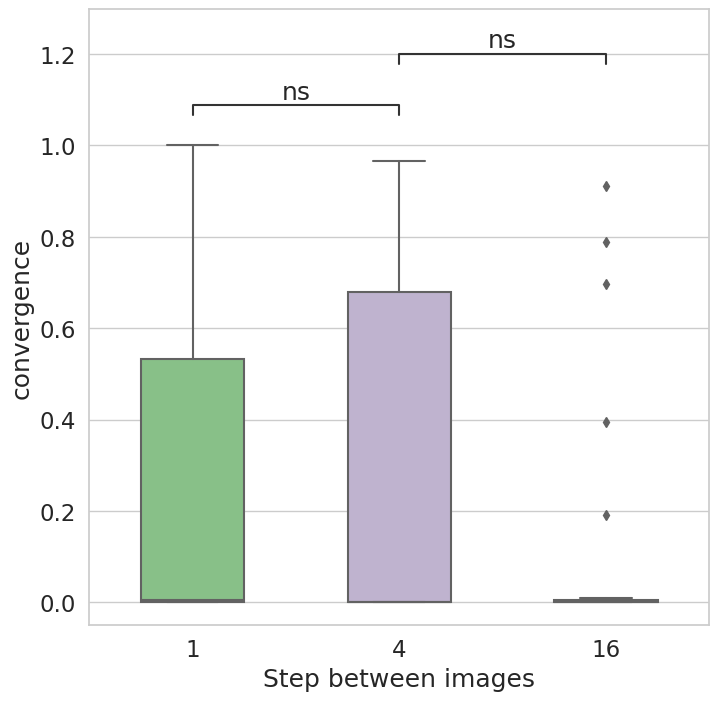

In [11]:
steps = [1, 4, 16]
with sns.plotting_context('notebook', font_scale=1.5):
    plt.figure(figsize=(8, 8))
    df_ = df
    step_one = df_[df_.step == 1].conv.values
    step_four = df_[df_.step == 4].conv.values
    step_sixteen = df_[df_.step == 16].conv.values
    df_ = pd.DataFrame(list(zip(step_one, step_four, step_sixteen)), columns=steps)
    ax = sns.boxplot(data=df_, palette=colors, width=0.5)
    ax.set(ylabel='convergence',
           xlabel='Step between images')
    pairs = [(1, 4), (4, 16)]
    annotator = Annotator(ax, pairs, data=df_)
    annotator.configure(test='Mann-Whitney', text_format='star', verbose=1)
    annotator.apply_and_annotate()
    plt.xlabel('Step between images')
#plt.savefig("diagrams/plotVII.png",dpi=200)
plt.show()

/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:1.409e-01 U_stat=4.650e+01
4 vs. 16: Mann-Whitney-Wilcoxon test two-sided, P_val:1.889e-01 U_stat=4.500e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:7.914e-01 U_stat=3.500e+01
4 vs. 16: Mann-Whitney-Wilcoxon test two-sided, P_val:1.275e-01 U_stat=4.700e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 4: Mann-Whitney-Wilcoxon test two-sided, P_val:7.001e-01 U_stat=3.500e+01
4 vs. 16: Mann-Whitney-Wilcoxon test two-sided, P_val:4

/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/csehi/anaconda3/envs/idnerf/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


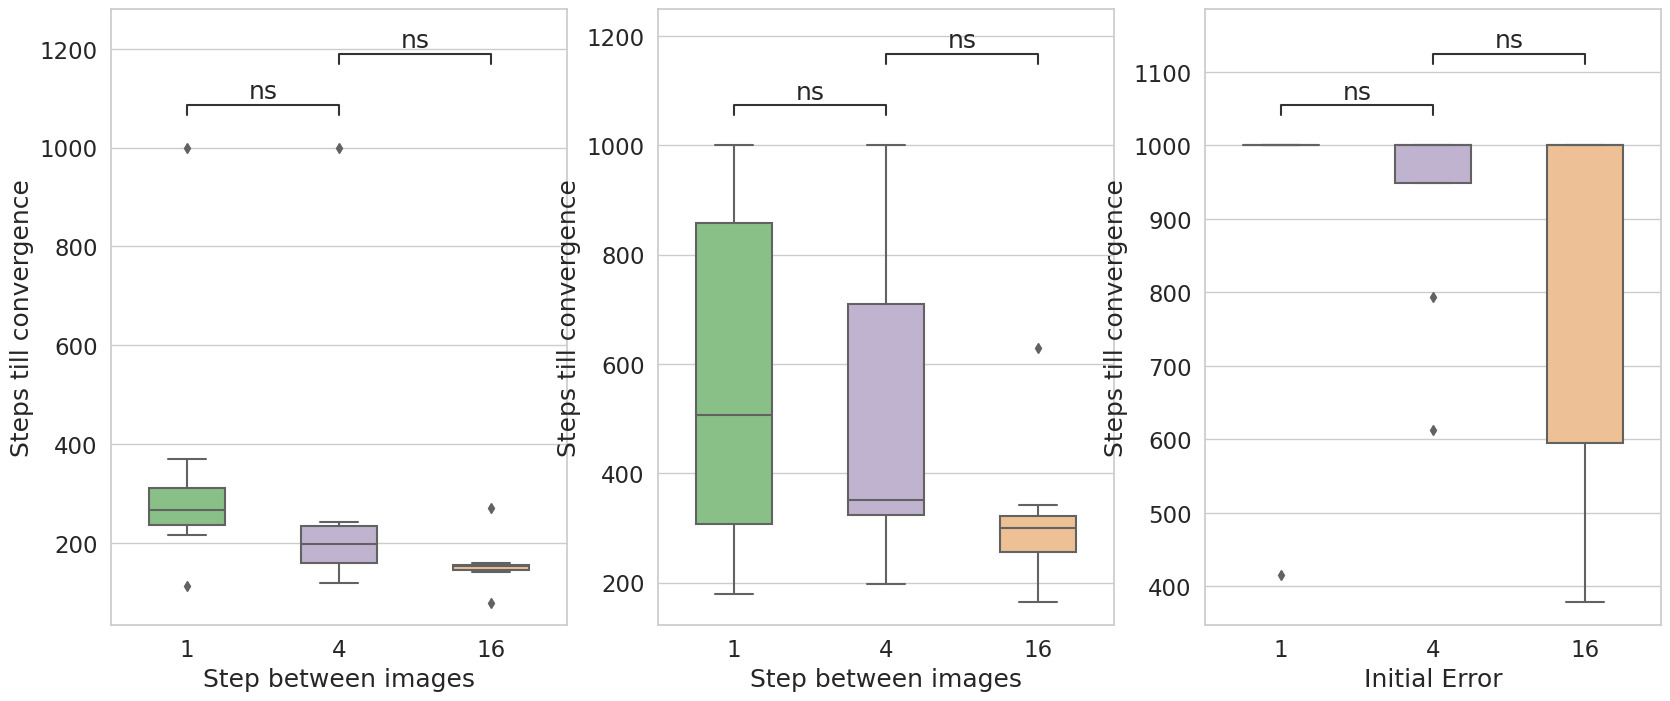

In [13]:
errors = [2, 4, 8]
steps = [1, 4, 16]
with sns.plotting_context('notebook', font_scale=1.5):
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    for error, ax in zip(errors, axs):
        df_ = df[df.error == error]
        step_one = df_[df_.step == 1].conv_idx.values
        step_four = df_[df_.step == 4].conv_idx.values
        step_sixteen = df_[df_.step == 16].conv_idx.values
        df_ = pd.DataFrame(list(zip(step_one, step_four, step_sixteen)), columns=steps)
        ax = sns.boxplot(data=df_, palette=colors, width=0.5, ax=ax)
        ax.set(ylabel='Steps till convergence',
               xlabel='Step between images')
        pairs = [(1, 4), (4, 16)]
        annotator = Annotator(ax, pairs, data=df_)
        annotator.configure(test='Mann-Whitney', text_format='star', verbose=1)
        annotator.apply_and_annotate()
    plt.xlabel('Initial Error')
#plt.savefig("diagrams/plotVII.png",dpi=200)
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

low vs. normal: Mann-Whitney-Wilcoxon test two-sided, P_val:3.980e-07 U_stat=2.730e+02
normal vs. high: Mann-Whitney-Wilcoxon test two-sided, P_val:5.140e-09 U_stat=2.140e+02


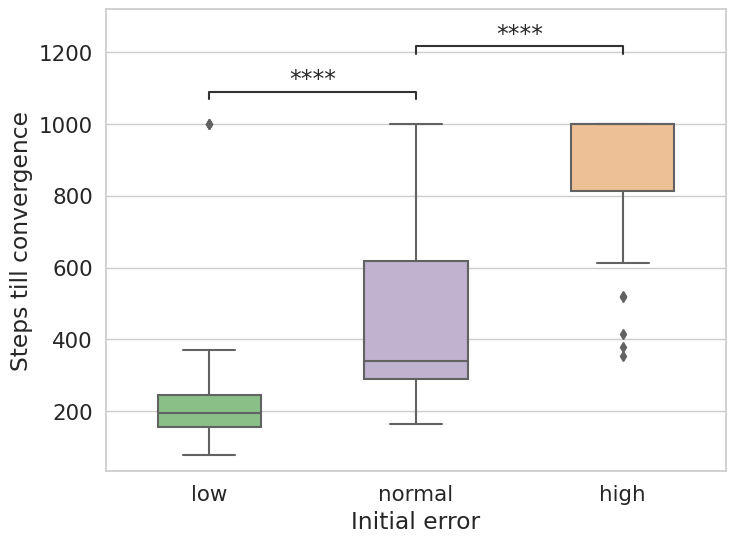

In [14]:
low_error = df[df.error == 2].conv_idx.values
normal_error = df[df.error == 4].conv_idx.values
high_error = df[df.error == 8].conv_idx.values
labels = ['low','normal', 'high']
df_ = pd.DataFrame(list(zip(low_error, normal_error, high_error)), columns = labels)
with sns.plotting_context('notebook', font_scale = 1.4):
  plt.figure(figsize=(8,6))
  ax = sns.boxplot(data=df_, palette=colors, width=0.5)
  ax.set(ylabel='Steps till convergence',
         xlabel='Initial error')
  pairs=[("low", "normal"), ("normal", "high")]
  annotator = Annotator(ax, pairs, data=df_)
  annotator.configure(test='Mann-Whitney', text_format='star', verbose=1)
  annotator.apply_and_annotate()
#plt.savefig("diagrams/plotVII.png",dpi=200)
plt.show()